In [101]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import idx2numpy
import scipy
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import load_img

In [102]:
path = './split/train/alpine_sea_holly'
name = 'image_06972.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299,299))
x = np.array(img)
x.shape

(299, 299, 3)

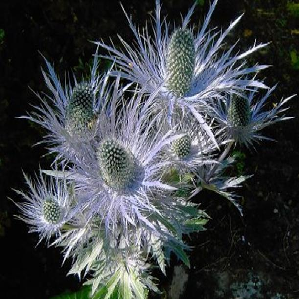

In [103]:
img

## Using pre-trained neural network

In [104]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [105]:
X = preprocess_input(X)
pred = model.predict(X)

1/1 [==============================] - 1s 773ms/step


In [106]:
decode_predictions(pred)

[[('n07730033', 'cardoon', 0.67385703),
  ('n03991062', 'pot', 0.05352241),
  ('n01914609', 'sea_anemone', 0.039953995),
  ('n11939491', 'daisy', 0.028683024),
  ('n02319095', 'sea_urchin', 0.024775598)]]

## Training Xception with the image dataset.

In [107]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [108]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [109]:
train_ds = train_gen.flow_from_directory('./split/train', seed=42, target_size=(150, 150), batch_size=32, class_mode='categorical')
val_ds = val_gen.flow_from_directory('./split/val', seed=42, target_size=(150, 150), batch_size=32, shuffle=False, class_mode='categorical')


Found 4874 images belonging to 102 classes.
Found 1602 images belonging to 102 classes.


In [110]:
train_ds.class_indices

{'alpine_sea_holly': 0,
 'anthurium': 1,
 'artichoke': 2,
 'azalea': 3,
 'ball_moss': 4,
 'balloon_flower': 5,
 'barbeton_daisy': 6,
 'bearded_iris': 7,
 'bee_balm': 8,
 'bird_of_paradise': 9,
 'bishop_of_llandaff': 10,
 'black-eyed_susan': 11,
 'blackberry_lily': 12,
 'blanket_flower': 13,
 'bolero_deep_blue': 14,
 'bougainvillea': 15,
 'bromelia': 16,
 'buttercup': 17,
 'californian_poppy': 18,
 'camellia': 19,
 'canna_lily': 20,
 'canterbury_bells': 21,
 'cape_flower': 22,
 'carnation': 23,
 'cautleya_spicata': 24,
 'clematis': 25,
 'colts_foot': 26,
 'columbine': 27,
 'common_dandelion': 28,
 'corn_poppy': 29,
 'cyclamen': 30,
 'daffodil': 31,
 'desert_rose': 32,
 'english_marigold': 33,
 'fire_lily': 34,
 'foxglove': 35,
 'frangipani': 36,
 'fritillary': 37,
 'garden_phlox': 38,
 'gaura': 39,
 'gazania': 40,
 'geranium': 41,
 'giant_white_arum_lily': 42,
 'globe-flower': 43,
 'globe_thistle': 44,
 'grape_hyacinth': 45,
 'great_masterwort': 46,
 'hard-leaved_pocket_orchid': 47,
 'h

In [115]:
base_model = Xception(weights='imagenet', input_shape=(150, 150, 3), include_top=False)

base_model.trainable=False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(102)(vectors)

model = keras.Model(inputs, outputs)

In [116]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [118]:
info = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
153/153 [==============================] - 135s 882ms/step - loss: 1.5473 - accuracy: 0.6992 - val_loss: 1.9590 - val_accuracy: 0.6729
Epoch 2/10
153/153 [==============================] - 144s 939ms/step - loss: 0.6019 - accuracy: 0.8471 - val_loss: 1.6094 - val_accuracy: 0.7266
Epoch 3/10
153/153 [==============================] - 145s 952ms/step - loss: 0.3574 - accuracy: 0.9034 - val_loss: 1.6164 - val_accuracy: 0.7235
Epoch 4/10
153/153 [==============================] - 161s 1s/step - loss: 0.1917 - accuracy: 0.9409 - val_loss: 1.8356 - val_accuracy: 0.7179
Epoch 5/10
153/153 [==============================] - 164s 1s/step - loss: 0.1767 - accuracy: 0.9485 - val_loss: 1.7179 - val_accuracy: 0.7416
Epoch 6/10
153/153 [==============================] - 155s 1s/step - loss: 0.1707 - accuracy: 0.9542 - val_loss: 1.8596 - val_accuracy: 0.7397
Epoch 7/10
153/153 [==============================] - 141s 921ms/step - loss: 0.1390 - accuracy: 0.9575 - val_loss: 1.8387 - val_accu

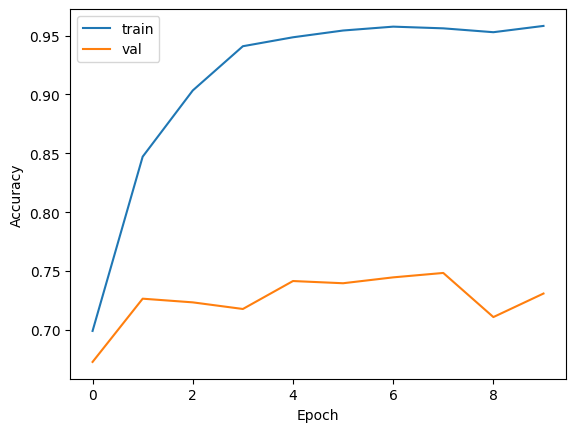

In [123]:
plt.plot(info.history['accuracy'], label='train')
plt.plot(info.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## Adjusting learning rate

In [124]:
def make_model(learning_rate=0.01):
	base_model = Xception(weights='imagenet', input_shape=(150, 150, 3), include_top=False)
	base_model.trainable=False
	inputs = keras.Input(shape=(150, 150, 3))
	base = base_model(inputs, training=False)
	vectors = keras.layers.GlobalAveragePooling2D()(base)
	outputs = keras.layers.Dense(102)(vectors)
	model = keras.Model(inputs, outputs)
	optimizer = keras.optimizers.Adam(learning_rate=0.01)
	loss = keras.losses.CategoricalCrossentropy(from_logits=True)
	model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
	return model

In [ ]:
for lr in [0.0001, 0.001, 0.01, 0.1]:
	print(lr)
	model = make_model(learning_rate=lr)
	info = model.fit(train_ds, epochs=10, validation_data=val_ds)
	scores[lr] = info.history
	print()
	print()